<a href="https://colab.research.google.com/github/dalenti/ComputerVision/blob/main/CV_Sesi4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convert RGB to Hex

In [15]:
def rgb_to_hex(r, g, b):
    hex_color = "#{:02x}{:02x}{:02x}".format(r, g, b)
    return hex_color

# Example usage:
red = 255
green = 0
blue = 128

hex_code = rgb_to_hex(red, green, blue)
print("RGB({}, {}, {}) is equivalent to {}".format(red, green, blue, hex_code))


RGB(255, 0, 128) is equivalent to #ff0080


Convert RGB to CMYK


In [16]:
def rgb_to_cmyk(r, g, b):
    # Normalize the RGB values to the range [0, 1]
    r_normalized = r / 255.0
    g_normalized = g / 255.0
    b_normalized = b / 255.0

    # Find the maximum value among the normalized RGB components
    max_value = max(r_normalized, g_normalized, b_normalized)

    # Calculate the Key (K) component
    k = 1 - max_value

    # Check for black
    if k == 1.0:
        c = m = y = 0.0
    else:
        # Calculate the Cyan (C), Magenta (M), and Yellow (Y) components
        c = (1 - r_normalized - k) / (1 - k)
        m = (1 - g_normalized - k) / (1 - k)
        y = (1 - b_normalized - k) / (1 - k)

    return c, m, y, k

# Example usage:
red = 255
green = 0
blue = 128

cmyk_values = rgb_to_cmyk(red, green, blue)
print("RGB({}, {}, {}) is equivalent to CMYK({}, {}, {}, {})".format(
    red, green, blue, cmyk_values[0], cmyk_values[1], cmyk_values[2], cmyk_values[3]))


RGB(255, 0, 128) is equivalent to CMYK(0.0, 1.0, 0.4980392156862745, 0.0)


HEX to RGB


In [18]:
def hex_to_rgb(hex_color):
    # Remove the '#' character if present
    hex_color = hex_color.lstrip('#')

    # Ensure the hex string is of valid length (3 or 6 characters)
    if len(hex_color) not in (3, 6):
        raise ValueError("Invalid hex color code")

    # If the hex string is 3 characters, expand it to 6 characters
    if len(hex_color) == 3:
        hex_color = ''.join([char * 2 for char in hex_color])

    # Parse the hex values for red, green, and blue
    r = int(hex_color[0:2], 16)
    g = int(hex_color[2:4], 16)
    b = int(hex_color[4:6], 16)

    return r, g, b

# Example usage:
hex_color_code = "#FF00C0"  # Replace with your hex color code
rgb_values = hex_to_rgb(hex_color_code)
print("Hex color {} is equivalent to RGB({}, {}, {})".format(hex_color_code, *rgb_values))


Hex color #FF00C0 is equivalent to RGB(255, 0, 192)


CMYK to RGB


In [19]:
def cmyk_to_rgb(c, m, y, k):
    r = 255 * (1 - c) * (1 - k)
    g = 255 * (1 - m) * (1 - k)
    b = 255 * (1 - y) * (1 - k)
    return int(r), int(g), int(b)

# Example usage:
cmyk_values = (0.2, 0.4, 0.6, 0.1)  # Replace with your CMYK values
rgb_values = cmyk_to_rgb(*cmyk_values)
print("CMYK({}, {}, {}, {}) is equivalent to RGB({}, {}, {})".format(
    cmyk_values[0], cmyk_values[1], cmyk_values[2], cmyk_values[3], *rgb_values))


CMYK(0.2, 0.4, 0.6, 0.1) is equivalent to RGB(183, 137, 91)


Filtrasi Citra dengan Teknik Sharpening


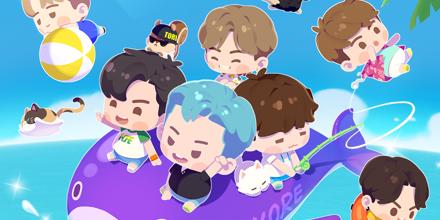

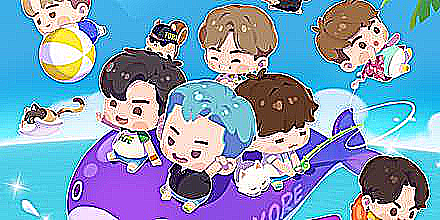

In [20]:
import cv2
import numpy as np

# Baca citra
input_image = cv2.imread('TinyTan.jpeg')

# Buat kernel untuk sharpening (contoh: kernel sharpening dengan 3x3)
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])

# Aplikasikan filter ke citra
sharpened_image = cv2.filter2D(input_image, -1, kernel)

# Tampilkan citra asli dan citra hasil sharpening
from google.colab.patches import cv2_imshow
# Display the original image
cv2_imshow(input_image)
cv2_imshow(sharpened_image)

# Tunggu tombol key untuk menutup jendela
cv2.waitKey(0)
cv2.destroyAllWindows()


Filtrasi Citra Thresholding

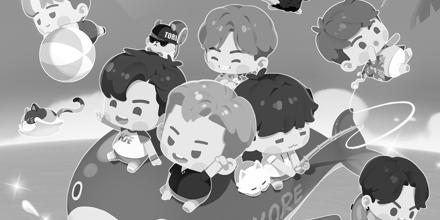

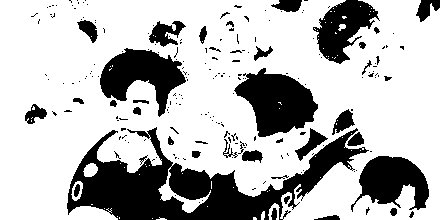

In [ ]:
import cv2

# Baca citra dalam mode grayscale
input_image = cv2.imread('TinyTan.jpeg', cv2.IMREAD_GRAYSCALE)

# Terapkan thresholding
# Citra akan menjadi hitam atau putih dengan ambang 128 (ubah sesuai kebutuhan)
_, thresholded_image = cv2.threshold(input_image, 128, 255, cv2.THRESH_BINARY)

# Tampilkan citra asli dan citra hasil sharpening
from google.colab.patches import cv2_imshow
# Display the original image
cv2_imshow(input_image)
cv2_imshow(thresholded_image)


# Tunggu tombol key untuk menutup jendela
cv2.waitKey(0)
cv2.destroyAllWindows()


Denoising

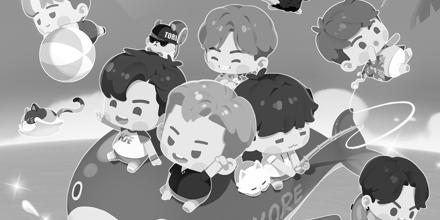

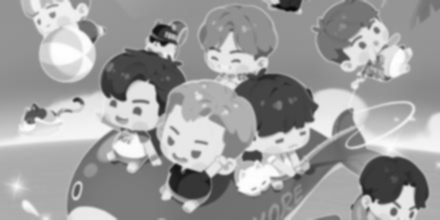

In [ ]:
import cv2

# Read the noisy image
noisy_image = cv2.imread('TinyTan.jpeg')

# Convert the image to grayscale (if it's a color image)
gray_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur for denoising
denoised_image = cv2.GaussianBlur(gray_image, (5, 5), 0)  # Adjust kernel size as needed

# Tampilkan citra asli dan citra hasil sharpening
from google.colab.patches import cv2_imshow
# Display the original image
cv2_imshow(input_image)
cv2_imshow(denoised_image)

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()


Blurring

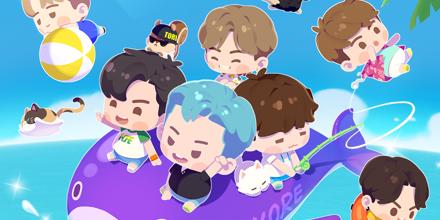

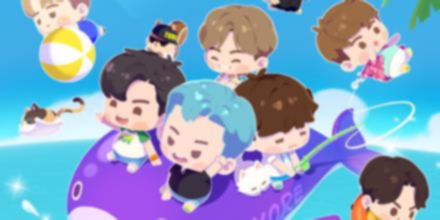

In [ ]:
import cv2

# Read the input image
input_image = cv2.imread('TinyTan.jpeg')

# Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(input_image, (5, 5), 0)  # Adjust kernel size as needed

# Tampilkan citra asli dan citra hasil sharpening
from google.colab.patches import cv2_imshow
# Display the original image
cv2_imshow(input_image)
cv2_imshow(blurred_image)

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()


Edge Detection

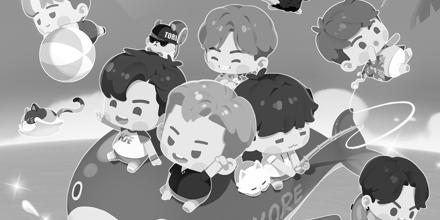

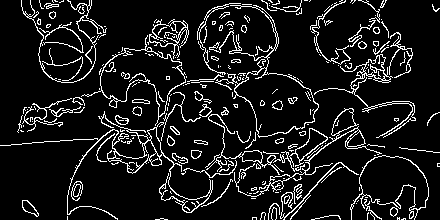

In [ ]:
import cv2

# Read the input image in grayscale
input_image = cv2.imread('TinyTan.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(input_image, 100, 200)  # Adjust the threshold values as needed

# Tampilkan citra asli dan citra hasil sharpening
from google.colab.patches import cv2_imshow
# Display the original image
cv2_imshow(input_image)
cv2_imshow(edges)

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()


Transformasi Fourier

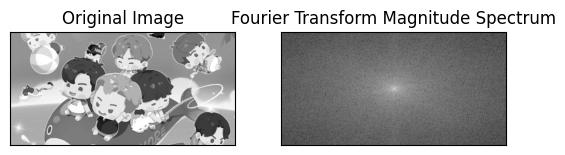

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image in grayscale
input_image = cv2.imread('TinyTan.jpeg', cv2.IMREAD_GRAYSCALE)

# Perform Fourier Transform
fourier_transform = np.fft.fft2(input_image)
fourier_shifted = np.fft.fftshift(fourier_transform)
magnitude_spectrum = np.log(np.abs(fourier_shifted) + 1)  # Log-scaled magnitude spectrum

# Display the original image and the Fourier Transform magnitude spectrum
plt.subplot(121), plt.imshow(input_image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()
